**Contexte**

L'ensemble de données d'origine contient 1000 observations réparties sur 10 variables, élaborées par le professeur Hofmann et disponibles sur Kaggle. Chaque observation représente une personne faisant une demande de crédit auprès d'une banque, et cette personne est ensuite classée en fonction de son risque de crédit (bon ou mauvais). Les variables sont les suivantes :

    - Age (numérique)
    - Sex (catégorique : homme, femme)
    - Job (numérique : 0 - non qualifié et non résident, 1 - non qualifié et résident, 2 - qualifié, 3 - hautement qualifié)
    - Housing (catégorique : propre, loué, gratuit)
    - Saving accounts (catégorique : peu, moyen, assez riche, riche)
    - Checking account (numérique, en DM)
    - Credit amount (numérique, en DM)
    - Duration (numérique, en mois)
    - Purpose (catégorique : voiture, mobilier/équipement, radio/TV, appareils ménagers, réparations, éducation, affaires, vacances/autres)

**Objectif**

L'objectif est de développer un modèle de classification capable de prédire si une personne sera classée comme ayant un bon ou un mauvais risque de crédit, en fonction des attributs mentionnés. Ce modèle pourra être utilisé par les banques pour évaluer et gérer les risques associés aux demandes de crédit.

Étapes de développement du modèle :

    1. Analyse exploratoire des données :
        - Réaliser une exploration initiale des données pour mieux comprendre les relations entre les variables, détecter des corrélations, identifier d’éventuelles anomalies ou biais, et évaluer la distribution des classes.

    2. Préparation des données :
        - Nettoyage des données : Supprimer les données manquantes ou erronées.
        - Encodage des variables catégorielles : Convertir les attributs catégoriels (comme Sex, Housing, ou Purpose) en variables numériques à l'aide de techniques comme l'encodage one-hot ou ordinal.
        - Normalisation des données : Appliquer une normalisation ou une standardisation aux variables numériques (par exemple, Age, Credit amount, Duration) afin d'éviter que certaines caractéristiques n'influencent excessivement le modèle.

    3. Division des données :
        - Séparer l'ensemble des données en un jeu d'entraînement et un jeu de test (par exemple, 80 % pour l'entraînement et 20 % pour le test).

    4. Sélection du modèle :
        Plusieurs algorithmes de classification binaire peuvent être utilisés pour prédire le risque de crédit :
            - Régression logistique (Logistic Regression)
            - K-Plus Proches Voisins (KNN)
            - Arbre de décision (Decision Tree)
            - Forêt aléatoire (Random Forest)
            - Machines à vecteurs de support (SVM)
            - XGBoost (boosting de gradient extrême)

    5. Entraînement du modèle :
        - Entraîner le modèle sur les données d’entraînement.
        - Appliquer des techniques de validation croisée pour éviter le surapprentissage (overfitting) et garantir la généralisation du modèle.

    6. Évaluation du modèle :
        Évaluer la performance du modèle avec des indicateurs de classification, tels que :
            - Précision (Accuracy) : Le pourcentage de prédictions correctes.
            - Précision (Precision) et Rappel (Recall) : Ces métriques sont spécifiques aux classes de bon ou mauvais risque.
            - F-mesure (F1-score) : La moyenne harmonique de la précision et du rappel.
            - AUC-ROC : La courbe des caractéristiques du récepteur, permettant de mesurer la capacité du modèle à discriminer entre les deux classes.

    7. Optimisation :
        - Ajuster les hyperparamètres du modèle pour maximiser ses performances.
        - Utiliser des techniques comme la recherche en grille (Grid Search) ou l'optimisation bayésienne pour trouver les meilleurs paramètres.

    8. Mise en production :
        - Une fois le modèle validé et optimisé, il peut être déployé pour prédire le risque de crédit des nouvelles demandes, permettant ainsi à la banque de prendre des décisions éclairées.

<p style = 'text-align : center; font-weight : bold; font-size : 24px; color : dodgerblue;'>Importation des modules necessaires</p>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_curve, auc, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

<p style = 'text-align : center; font-weight : bold; font-size : 24px; color : dodgerblue;'>Chargement de la base de données</p>

In [2]:
df = pd.read_csv('Data/german_credit_data.csv', usecols = lambda column : column != 'Unnamed: 0')
display(df.head(2))
display(df.info())

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.3+ KB


None

<p style = 'text-align : center; font-weight : bold; font-size : 24px; color : dodgerblue;'>Analyse exploiratoire des données</p>

In [107]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

On remarque que seules les variables "Saving accounts" et "Checking account" présentent des valeurs manquantes, respectivement 183 et 394 valeurs nulles, que nous traiterons ultérieurement en utilisant différentes méthodes.

In [6]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


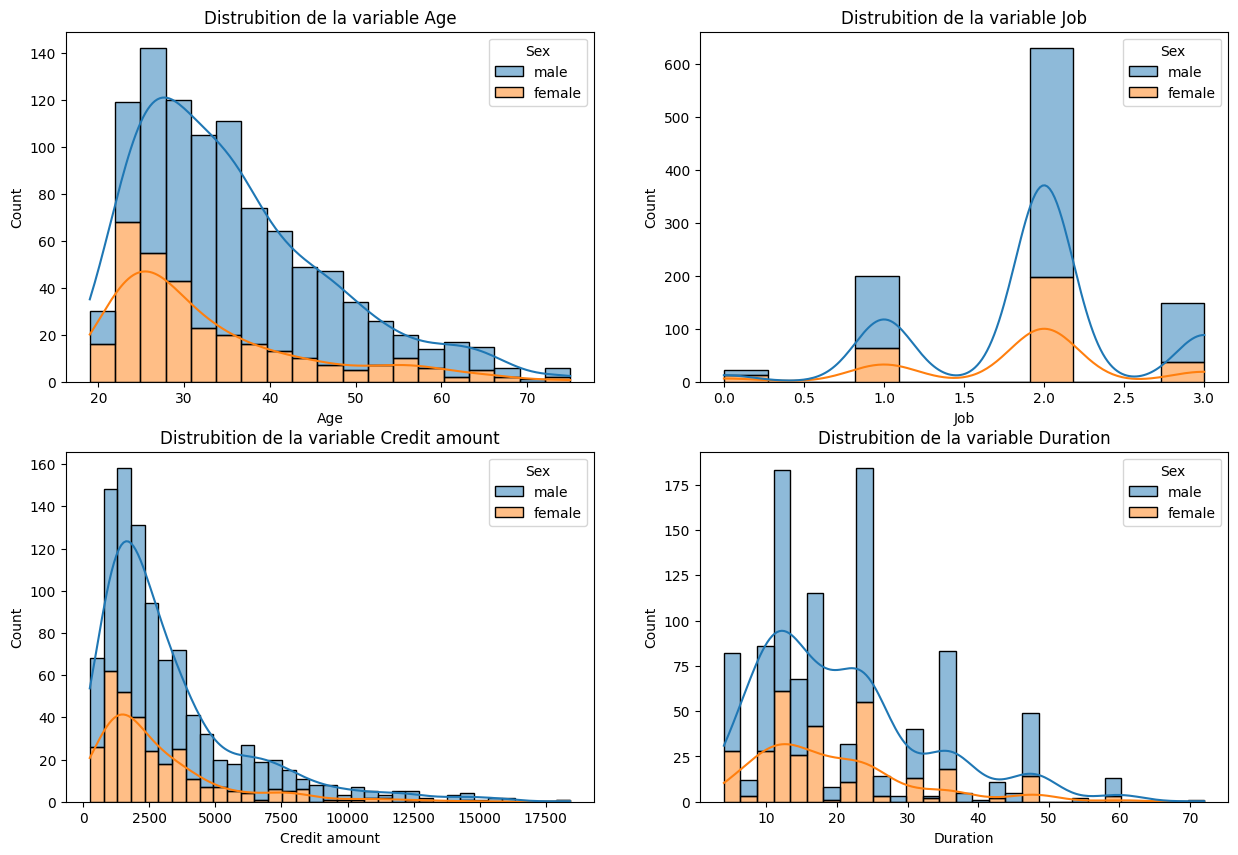

In [65]:
fig, axs = plt.subplots(2, 2, figsize = (15, 10))
for index, column in enumerate(df.select_dtypes(include = 'number')) :
    sns.histplot(data = df, x = column, kde = True, hue = 'Sex', multiple = 'stack', ax = axs[index // 2, index % 2])
    axs[index // 2, index % 2].title.set_text(f'Distrubition de la variable {column}')
plt.show()

D'après l'analyse des graphiques, on observe que les variables numériques, telles que l'âge, le métier, le montant du crédit et la durée, ne suivent pas une distribution normale. Plus précisément, les variables âge et montant du crédit semblent suivre une distribution exponentielle. Cela suggère que l'utilisation de modèles de régression classiques pourrait ne pas être optimale pour ce problème.

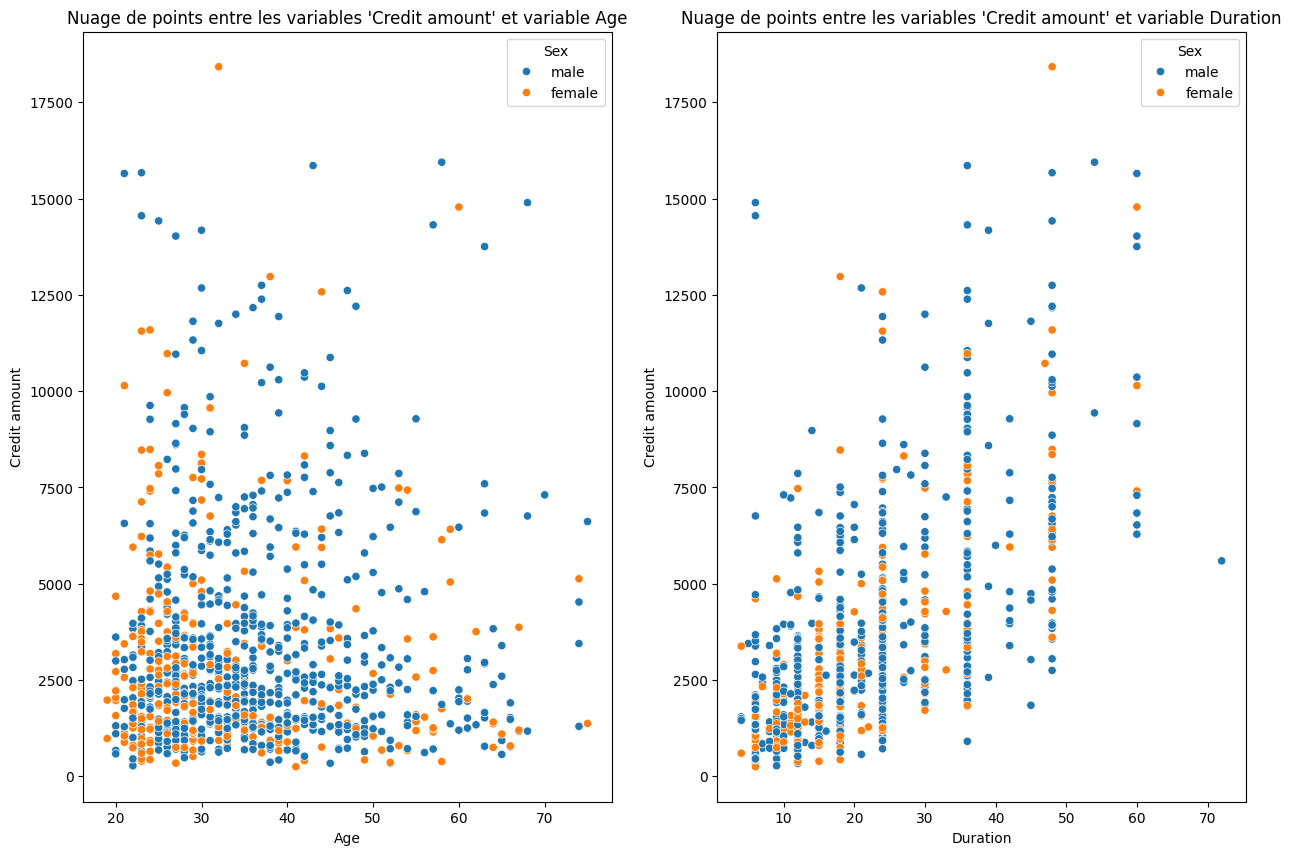

In [48]:
fig, axs = plt.subplots(1, 2, figsize = (15, 10))
columns = ['Age', 'Duration']
for index, column in enumerate(columns) :
    sns.scatterplot(data = df, x = column, y = 'Credit amount', hue = 'Sex', ax = axs[index])
    axs[index].title.set_text(f'Nuage de points entre les variables \'Credit amount\' et variable {column}')
plt.show()

À la vue des graphiques de nuage de points, on peut observer que le montant de crédit accordé aux individus est principalement concentré chez ceux âgés de 30 à 50 ans, avec une durée de crédit variant entre 10 et 20 mois. Cette tendance semble être plus marquée chez les individus de sexe masculin.

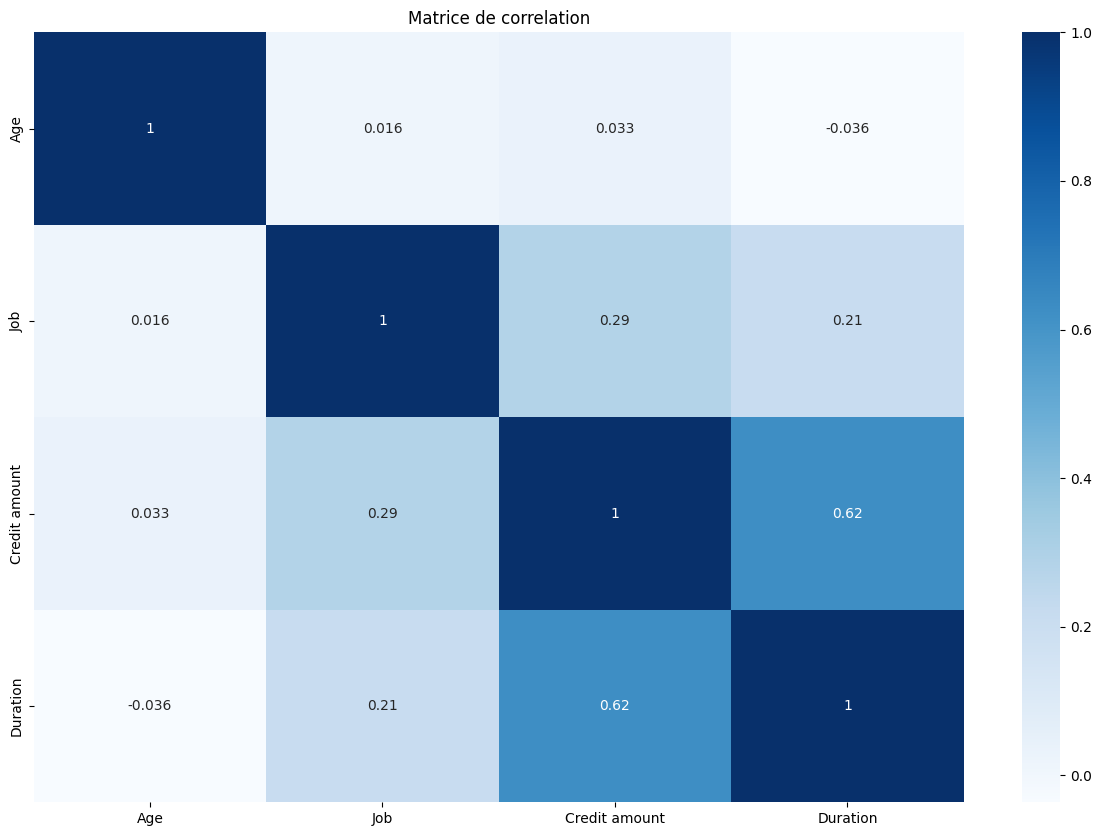

In [70]:
fig = plt.figure(figsize = (15, 10))
sns.heatmap(df.select_dtypes(include = 'number').corr(), annot = True, cmap = 'Blues')
plt.title('Matrice de correlation')
plt.show()

Cette heatmap montre clairement que seules les variables montant du crédit et durée présentent une corrélation relativement forte (0.62), tandis que les autres variables affichent des corrélations relativement faibles. Cela pourrait avoir un impact considérable sur la performance d'un modèle de régression classique, car une faible corrélation entre les variables indépendantes peut rendre le modèle moins capable de capter des relations significatives entre les variables et la variable cible.

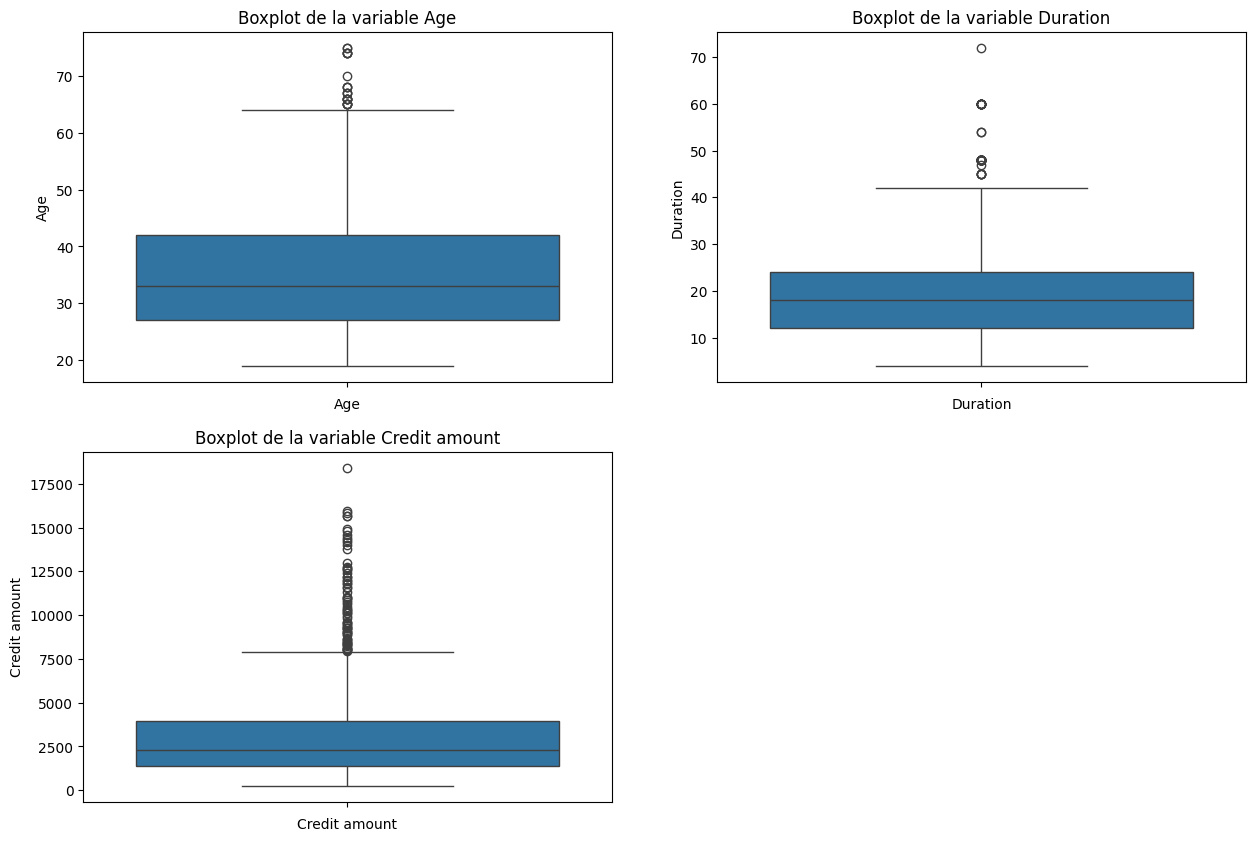

In [108]:
fig, axs = plt.subplots(2, 2, figsize = (15, 10))
columns = ['Age', 'Duration', 'Credit amount']
for index, column in enumerate(columns) :
    sns.boxplot(data = df, y = column, ax = axs[index // 2, index % 2])
    axs[index // 2, index % 2].set(xlabel = f'{column}')
    axs[index // 2, index % 2].title.set_text(f'Boxplot de la variable {column}')
fig.delaxes(axs[1, 1])
plt.show()

Ces différents boxplots montrent que les variables âge, durée et montant du crédit contiennent des valeurs extrêmes. Ces valeurs aberrantes seront traitées en fonction du modèle choisi, car certains modèles sont sensibles à la présence de telles valeurs, tandis que d'autres peuvent y être moins affectés.

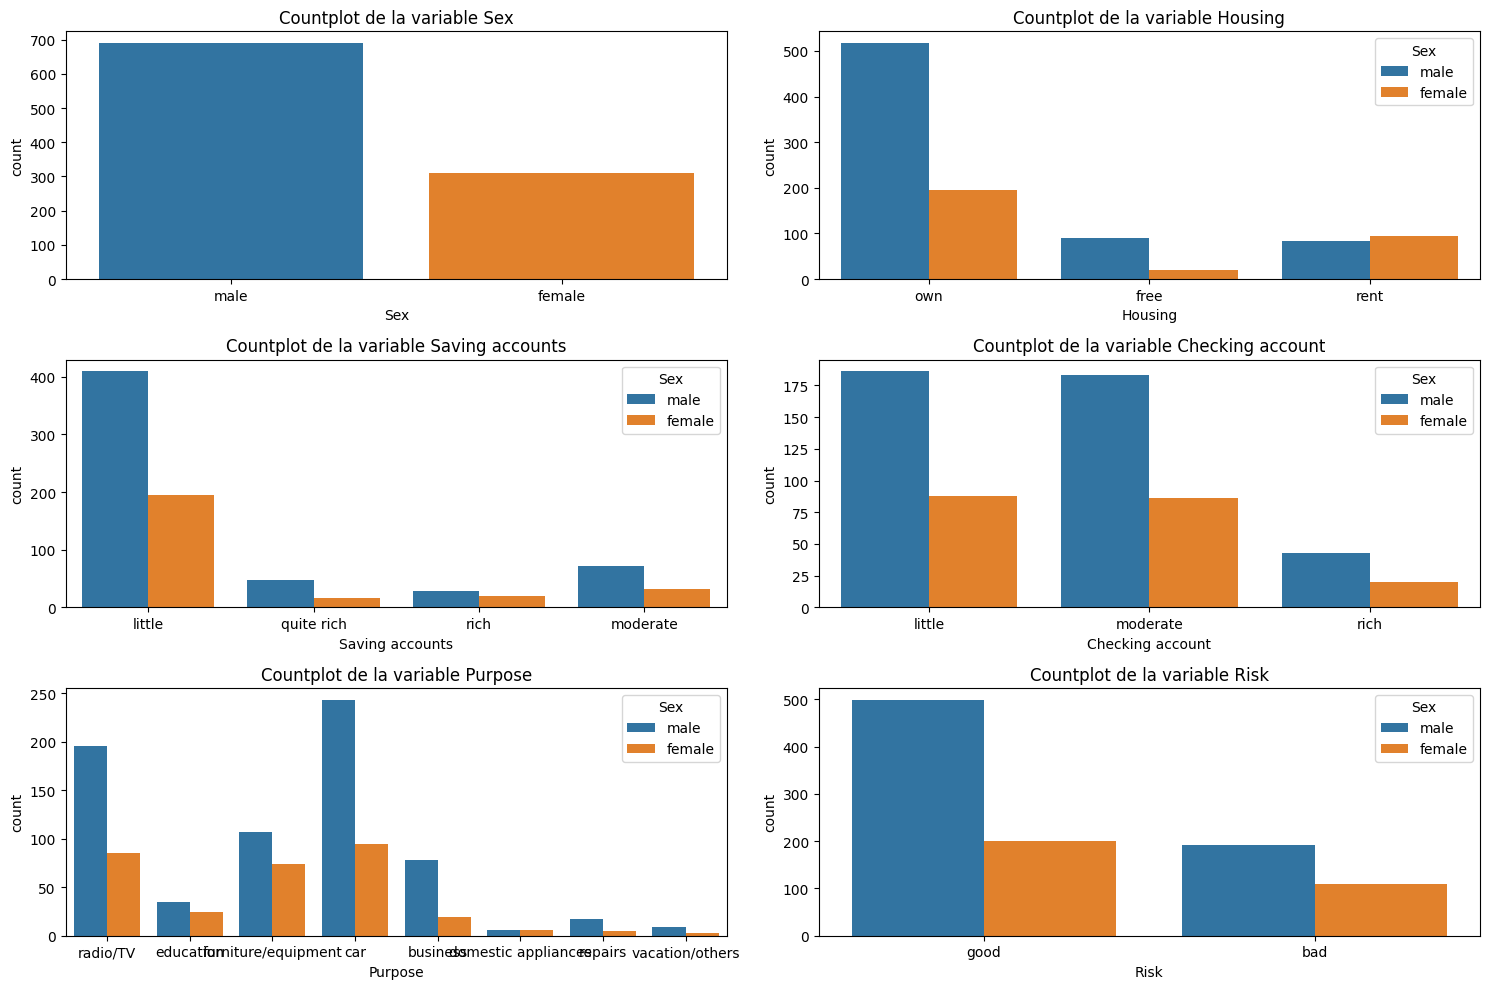

In [72]:
fig, axs = plt.subplots(3, 2, figsize = (15, 10))
for index, column in enumerate(df.select_dtypes(include = 'object')) :
    sns.countplot(data = df, x = column, hue = 'Sex', ax = axs[index // 2, index % 2])
    axs[index // 2, index % 2].title.set_text(f'Countplot de la variable {column}')
plt.tight_layout()
plt.show()

Ces différents graphiques montrent la distribution des variables catégoriques. On constate un important déséquilibre entre les différentes classes, notamment pour la variable cible Risk, avec 700 individus classés en "good" et 300 en "bad". Afin de traiter ce déséquilibre, nous rééquilibrerons les classes en utilisant diverses techniques telles que l'oversampling, l'undersampling ou SMOTE, afin d'améliorer la performance du modèle pour la classe minoritaire.

<p style = 'text-align : center; font-weight : bold; font-size : 24px; color : dodgerblue;'>Préparation des données</p>

In [3]:
# Le traitement des valeurs manquantes sera effectué par imputation avec le mode, étant donné que les valeurs manquantes concernent des variables catégorielles. 
# Pour ce faire, nous définirons une fonction qui retourne l'élément le plus fréquent d'une colonne.
df_transformed = df.copy() # Une copie du dataset
def get_mode(column) :
    return df[column].mode()[0]
df_transformed['Saving accounts'].fillna(get_mode('Saving accounts'), inplace = True)
df_transformed['Checking account'].fillna(get_mode('Checking account'), inplace = True)


In [4]:
# Traitement de svaleurs abberantes : on definera une fonction qui traite les valeurs abberantes d'une colonne en claculant le limite superieur et inferieur 
# grace au quartile puis electionner Le traitement des valeurs aberrantes sera effectué en définissant une fonction qui détecte et traite les valeurs aberrantes d'une colonne. 
# Cette fonction calcule les limites supérieure et inférieure à l'aide des quartiles, puis sélectionne les valeurs en dehors de ces limites comme valeurs aberrantes..
def handle_outliers(df, column) :
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
    return df
df_transformed = handle_outliers(df_transformed, 'Age')
df_transformed = handle_outliers(df_transformed, 'Duration')
df_transformed = handle_outliers(df_transformed, 'Credit amount')

In [4]:
# L'encodage des variables catégorielles sera réalisé en utilisant le LabelEncoder pour les variables qui possèdent un ordre préétabli dans leurs modalités, telles que Housing, Saving accounts et Checking account. 
# Pour les autres variables sans ordre défini, nous utiliserons la méthode One-Hot Encoding.
label_encoder = LabelEncoder()
for column in ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Risk'] :
    df_transformed[column] = label_encoder.fit_transform(df_transformed[column])

df_transformed = pd.get_dummies(df_transformed, columns = ['Purpose']).astype(int)
df_transformed

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,1,2,1,0,0,1169,6,1,0,0,0,0,0,1,0,0
1,22,0,2,1,0,1,5951,48,0,0,0,0,0,0,1,0,0
2,49,1,1,1,0,0,2096,12,1,0,0,0,1,0,0,0,0
3,45,1,2,0,0,0,7882,42,1,0,0,0,0,1,0,0,0
4,53,1,2,0,0,0,4870,24,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,0,1,1,0,0,1736,12,1,0,0,0,0,1,0,0,0
996,40,1,3,1,0,0,3857,30,1,0,1,0,0,0,0,0,0
997,38,1,2,1,0,0,804,12,1,0,0,0,0,0,1,0,0
998,23,1,2,0,0,0,1845,45,0,0,0,0,0,0,1,0,0


<p style = 'text-align : center; font-weight : bold; font-size : 24px; color : dodgerblue;'>Division et Rééquilibrage des données</p>

In [5]:
X, y = df_transformed.drop('Risk', axis = 1), df_transformed['Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

<p style = 'text-align : center; font-weight : bold; font-size : 24px; color : dodgerblue;'>Sélection, Entraînement et Évaluation de modèles</p>

<p style = 'text-align : center; font-weight : bold; font-size : 20px; color : dodgerblue;'>Modèle Regression Logistique</p>

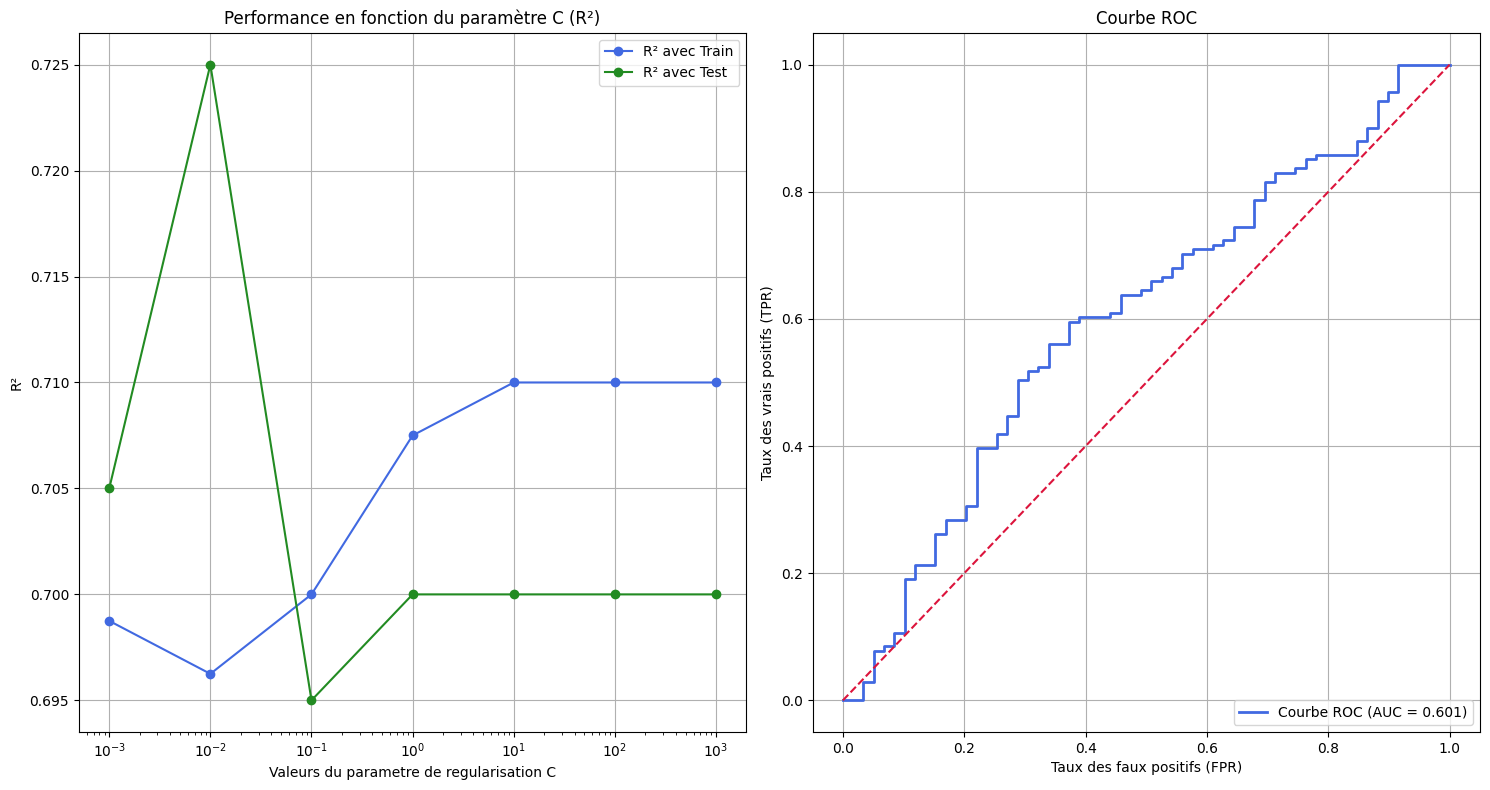

Best parameters :  {'C': 0.001, 'penalty': 'l2'}
R² avec Train : 0.699
R² avec Test : 0.705
AUC : 0.601
Train F1 Score:  0.8226637233259749
Test F1 Score:  0.8269794721407625


In [14]:
regulator_parameters = np.logspace(-3, 3, 7)
train_accuracy = np.empty(len(regulator_parameters))
test_accuracy = np.empty(len(regulator_parameters))

for index, regulator in enumerate(regulator_parameters) :
    logistic = LogisticRegression(C = regulator, random_state = 42)
    logistic.fit(X_train_scaled, y_train)

    train_accuracy[index] = logistic.score(X_train_scaled, y_train)
    test_accuracy[index] = logistic.score(X_test_scaled, y_test)


param_grid = {
    'C': regulator_parameters,
    'penalty': ['l1', 'l2', 'elasticnet']
}
grid_search = GridSearchCV(LogisticRegression(random_state = 42), param_grid, cv = 10, scoring = 'f1')
grid_search.fit(X_train_scaled, y_train)
best_logistic = grid_search.best_estimator_
train_accuracy_for_best_logistic = best_logistic.score(X_train_scaled, y_train)
test_accuracy_for_best_logistic = best_logistic.score(X_test_scaled, y_test)

y_pred_prob = best_logistic.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 8))

ax1.plot(regulator_parameters, train_accuracy, 'o-', label = 'R² avec Train', color = 'royalblue')
ax1.plot(regulator_parameters, test_accuracy, 'o-', label = 'R² avec Test', color = 'forestgreen')
ax1.set_xlabel('Valeurs du parametre de regularisation C')
ax1.set_ylabel('R²')
ax1.set_title('Performance en fonction du paramètre C (R²)')
ax1.set_xscale('log')
ax1.set_xticks(regulator_parameters)
ax1.legend(loc = 'best')
ax1.grid()

ax2.plot(fpr, tpr, color = 'royalblue', lw = 2, label = f'Courbe ROC (AUC = {roc_auc:.3f})')
ax2.plot([0, 1], [0, 1], color = 'crimson', linestyle = '--') 
ax2.set_xlabel('Taux des faux positifs (FPR)')
ax2.set_ylabel('Taux des vrais positifs (TPR)')
ax2.set_title('Courbe ROC')
ax2.legend(loc = 'lower right')
ax2.grid()

plt.tight_layout()
plt.show()

print("Best parameters : ", grid_search.best_params_)
print(f"R² avec Train : {train_accuracy_for_best_logistic:.3f}")
print(f"R² avec Test : {test_accuracy_for_best_logistic:.3f}")
print(f"AUC : {roc_auc:.3f}")

train_predictions = best_logistic.predict(X_train_scaled)
test_predictions = best_logistic.predict(X_test_scaled)

train_f1_score = f1_score(y_train, train_predictions)
test_f1_score = f1_score(y_test, test_predictions)

print("Train F1 Score: ", train_f1_score)
print("Test F1 Score: ", test_f1_score)

<p style = 'text-align : center; font-weight : bold; font-size : 20px; color : dodgerblue;'>Modèle KNN</p>

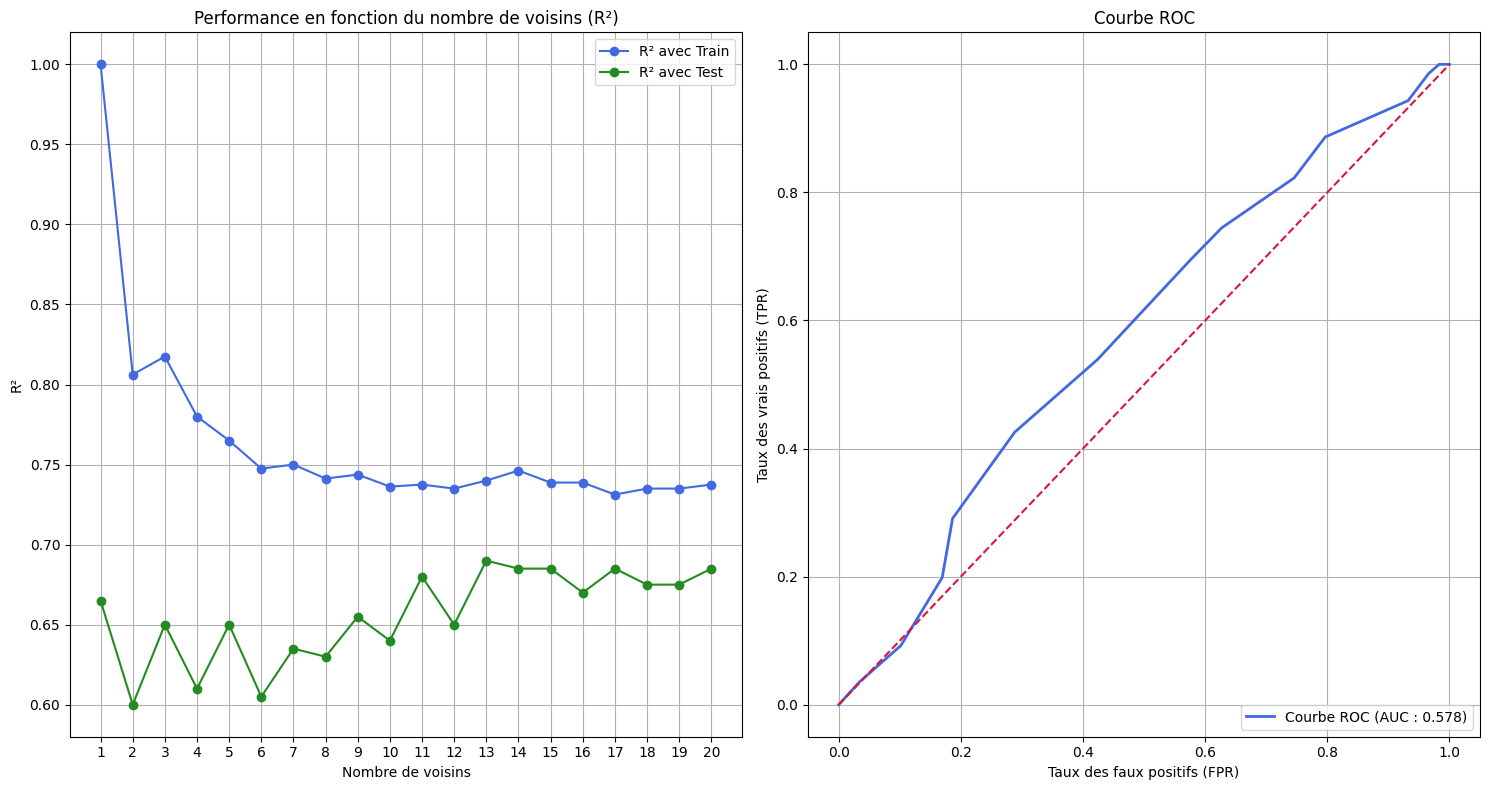

Best parameters :  {'n_neighbors': 20}
R² avec Train : 0.738
R² avec Test : 0.685
AUC : 0.578


In [7]:
neighbors = list(range(1, 21))
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for index, neighbor in enumerate(neighbors) :
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_train_scaled, y_train)
    
    train_accuracy[index] = knn.score(X_train_scaled, y_train)
    test_accuracy[index] = knn.score(X_test_scaled, y_test)

param_grid = {
    'n_neighbors': neighbors,
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 10, scoring = 'r2')
grid_search.fit(X_train_scaled, y_train)
best_knn = grid_search.best_estimator_
train_accuracy_for_best_knn = best_knn.score(X_train_scaled, y_train)
test_accuracy_for_best_knn = best_knn.score(X_test_scaled, y_test)

y_pred_proba = best_knn.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 8))

ax1.plot(neighbors, train_accuracy, 'o-', label = 'R² avec Train', color = 'royalblue')
ax1.plot(neighbors, test_accuracy, 'o-', label = 'R² avec Test', color = 'forestgreen')
ax1.set_xlabel('Nombre de voisins')
ax1.set_ylabel('R²')
ax1.set_title('Performance en fonction du nombre de voisins (R²)')
ax1.set_xticks(neighbors)
ax1.legend(loc = 'upper right')
ax1.grid()

ax2.plot(fpr, tpr, color = 'royalblue', lw = 2, label = f'Courbe ROC (AUC : {roc_auc:.3f})')
ax2.plot([0, 1], [0, 1], color = 'crimson', linestyle = '--')
ax2.set_xlabel('Taux des faux positifs (FPR)')
ax2.set_ylabel('Taux des vrais positifs (TPR)')
ax2.set_title('Courbe ROC')
ax2.legend(loc = 'lower right')
ax2.grid()

plt.tight_layout()
plt.show()

print("Best parameters : ", grid_search.best_params_)
print(f"R² avec Train : {train_accuracy_for_best_knn:.3f}")
print(f"R² avec Test : {test_accuracy_for_best_knn:.3f}")
print(f"AUC : {roc_auc:.3f}")

<p style = 'text-align : center; font-weight : bold; font-size : 20px; color : dodgerblue;'>Modèle Arbre de décision</p>

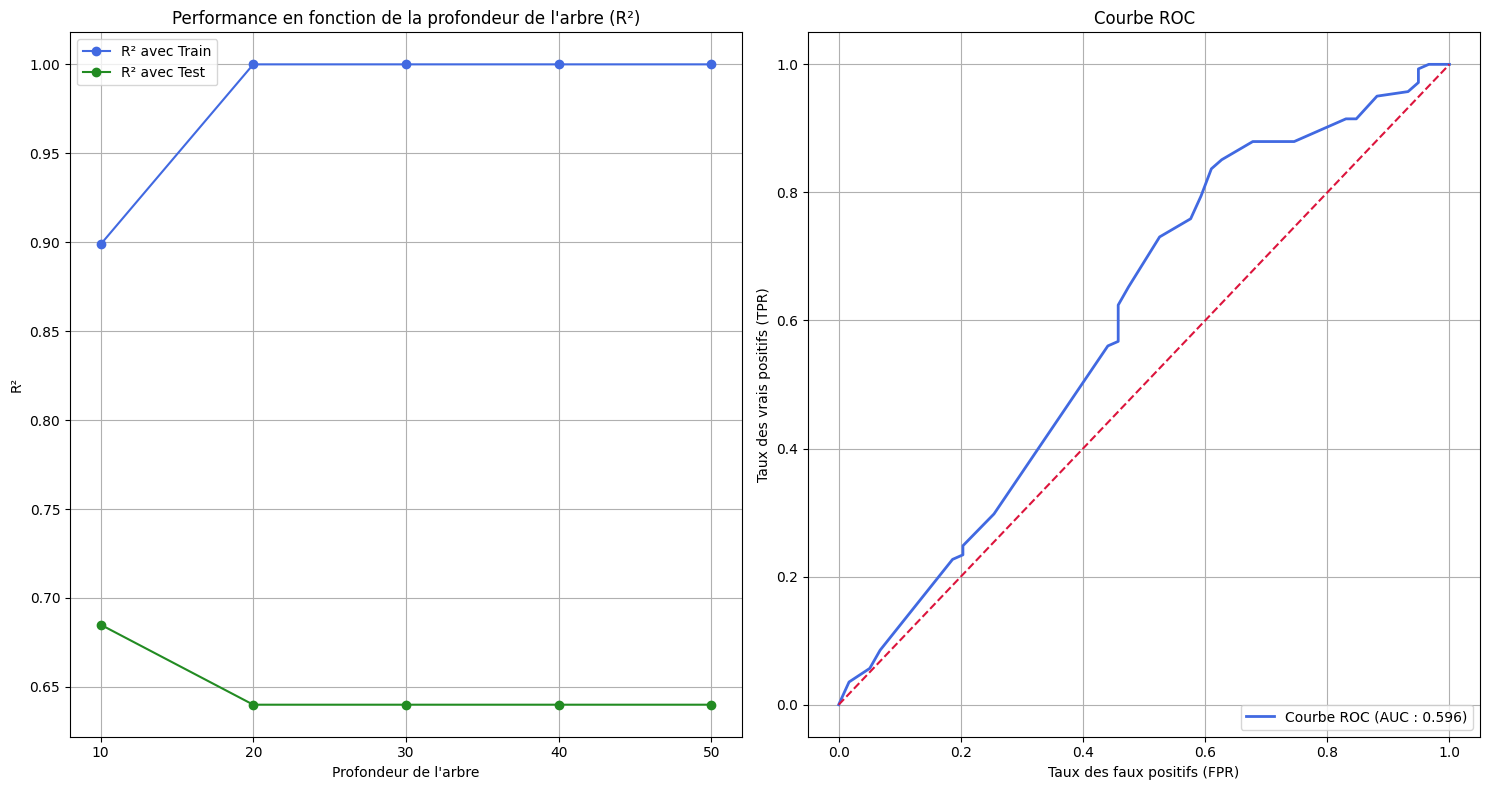

Best parameters :  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 7}
R² avec Train : 0.766
R² avec Test : 0.695
AUC : 0.596


In [8]:
depths = list(range(10, 51, 10))
train_accuracy = np.empty(len(depths))
test_accuracy = np.empty(len(depths))

for index, depth in enumerate(depths) :
    tree = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    tree.fit(X_train_scaled, y_train)

    train_accuracy[index] = tree.score(X_train_scaled, y_train)
    test_accuracy[index] = tree.score(X_test_scaled, y_test)

param_grid = {
    'max_depth': depths,
    'min_samples_leaf' : [2, 3, 5, 7],
    'max_features' : ['sqrt', 'log2', 'auto']
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state = 42), param_grid, cv = 10, scoring = 'r2')
grid_search.fit(X_train_scaled, y_train)
best_tree = grid_search.best_estimator_
train_accuracy_for_best_tree = best_tree.score(X_train_scaled, y_train)
test_accuracy_for_best_tree = best_tree.score(X_test_scaled, y_test)

y_pred_proba = best_tree.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 8))

ax1.plot(depths, train_accuracy, 'o-', label = 'R² avec Train', color = 'royalblue')
ax1.plot(depths, test_accuracy, 'o-', label = 'R² avec Test', color = 'forestgreen')
ax1.set_xlabel('Profondeur de l\'arbre')
ax1.set_ylabel('R²')
ax1.set_title('Performance en fonction de la profondeur de l\'arbre (R²)')
ax1.set_xticks(depths)
ax1.legend(loc = 'best')
ax1.grid()

ax2.plot(fpr, tpr, color = 'royalblue', lw = 2, label = f'Courbe ROC (AUC : {roc_auc:.3f})')
ax2.plot([0, 1], [0, 1], color = 'crimson', linestyle = '--')
ax2.set_xlabel('Taux des faux positifs (FPR)')
ax2.set_ylabel('Taux des vrais positifs (TPR)')
ax2.set_title('Courbe ROC')
ax2.legend(loc = 'lower right')
ax2.grid()

plt.tight_layout()
plt.show()


print("Best parameters : ", grid_search.best_params_)
print(f"R² avec Train : {train_accuracy_for_best_tree:.3f}")
print(f"R² avec Test : {test_accuracy_for_best_tree:.3f}")
print(f"AUC : {roc_auc:.3f}")

<p style = 'text-align : center; font-weight : bold; font-size : 20px; color : dodgerblue;'>Modèle Foret aleatoire</p>

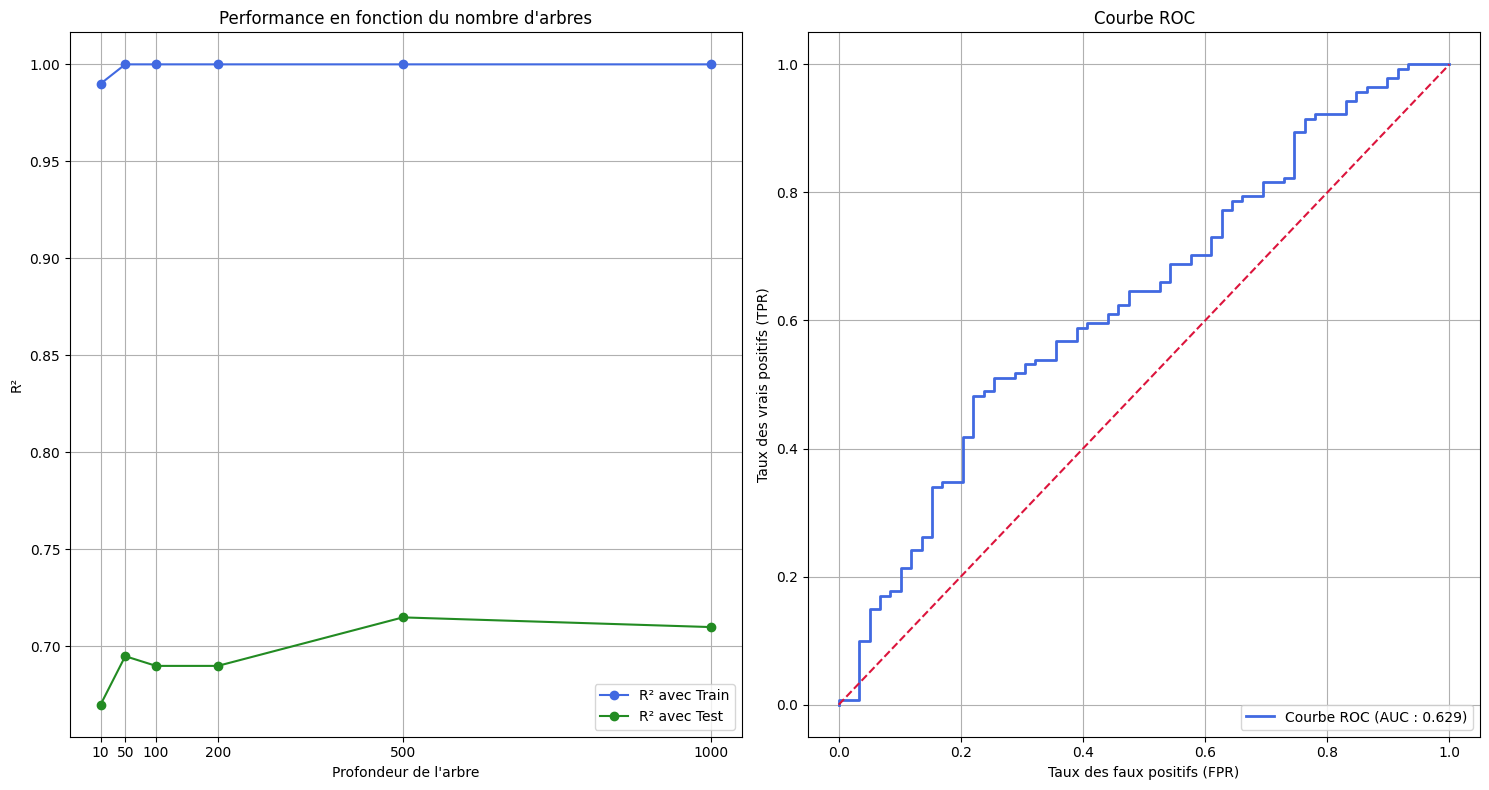

Best parameters :  {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 500}
R² avec Train : 0.761
R² avec Test : 0.720
AUC : 0.629
Train F1 Score:  0.8538638102524866
Test F1 Score:  0.8323353293413174


In [15]:
trees = [10, 50, 100, 200, 500, 1000]
train_accuracy = np.empty(len(trees))
test_accuracy = np.empty(len(trees))

for index, tree in enumerate(trees) :
    forest = RandomForestClassifier(n_estimators = tree, random_state = 42)
    forest.fit(X_train_scaled, y_train)

    train_accuracy[index] = forest.score(X_train_scaled, y_train)
    test_accuracy[index] = forest.score(X_test_scaled, y_test)

param_grid = {
    'n_estimators' : trees,
    'max_depth' : [2, 3, 5, 7],
    'min_samples_leaf' : [1, 2, 3, 5],
    'max_features' : ['log2', 'sqrt']
}
grid_search = GridSearchCV(RandomForestClassifier(random_state = 42), param_grid, cv = 10, scoring = 'f1')
grid_search.fit(X_train_scaled, y_train)
best_forest = grid_search.best_estimator_
train_accuracy_for_best_forest = best_forest.score(X_train_scaled, y_train)
test_accuracy_for_best_forest = best_forest.score(X_test_scaled, y_test)

y_pred_proba = best_forest.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 8))

ax1.plot(trees, train_accuracy, 'o-', label = 'R² avec Train', color = 'royalblue')
ax1.plot(trees, test_accuracy, 'o-', label = 'R² avec Test', color = 'forestgreen')
ax1.set_xlabel('Profondeur de l\'arbre')
ax1.set_ylabel('R²')
ax1.set_title('Performance en fonction du nombre d\'arbres')
ax1.set_xticks(trees)
ax1.legend(loc = 'lower right')
ax1.grid()

ax2.plot(fpr, tpr, color = 'royalblue', lw = 2, label = f'Courbe ROC (AUC : {roc_auc:.3f})')
ax2.plot([0, 1], [0, 1], color = 'crimson', linestyle = '--')
ax2.set_xlabel('Taux des faux positifs (FPR)')
ax2.set_ylabel('Taux des vrais positifs (TPR)')
ax2.set_title('Courbe ROC')
ax2.legend(loc = 'lower right')
ax2.grid()

plt.tight_layout()
plt.show()

print("Best parameters : ", grid_search.best_params_)
print(f"R² avec Train : {train_accuracy_for_best_forest:.3f}")
print(f"R² avec Test : {test_accuracy_for_best_forest:.3f}")
print(f"AUC : {roc_auc:.3f}")

train_predictions = best_forest.predict(X_train_scaled)
test_predictions = best_forest.predict(X_test_scaled)

train_f1_score = f1_score(y_train, train_predictions)
test_f1_score = f1_score(y_test, test_predictions)

print("Train F1 Score: ", train_f1_score)
print("Test F1 Score: ", test_f1_score)

<p style = 'text-align : center; font-weight : bold; font-size : 20px; color : dodgerblue;'>Modèle eXtreme Gradiant Boosting</p>

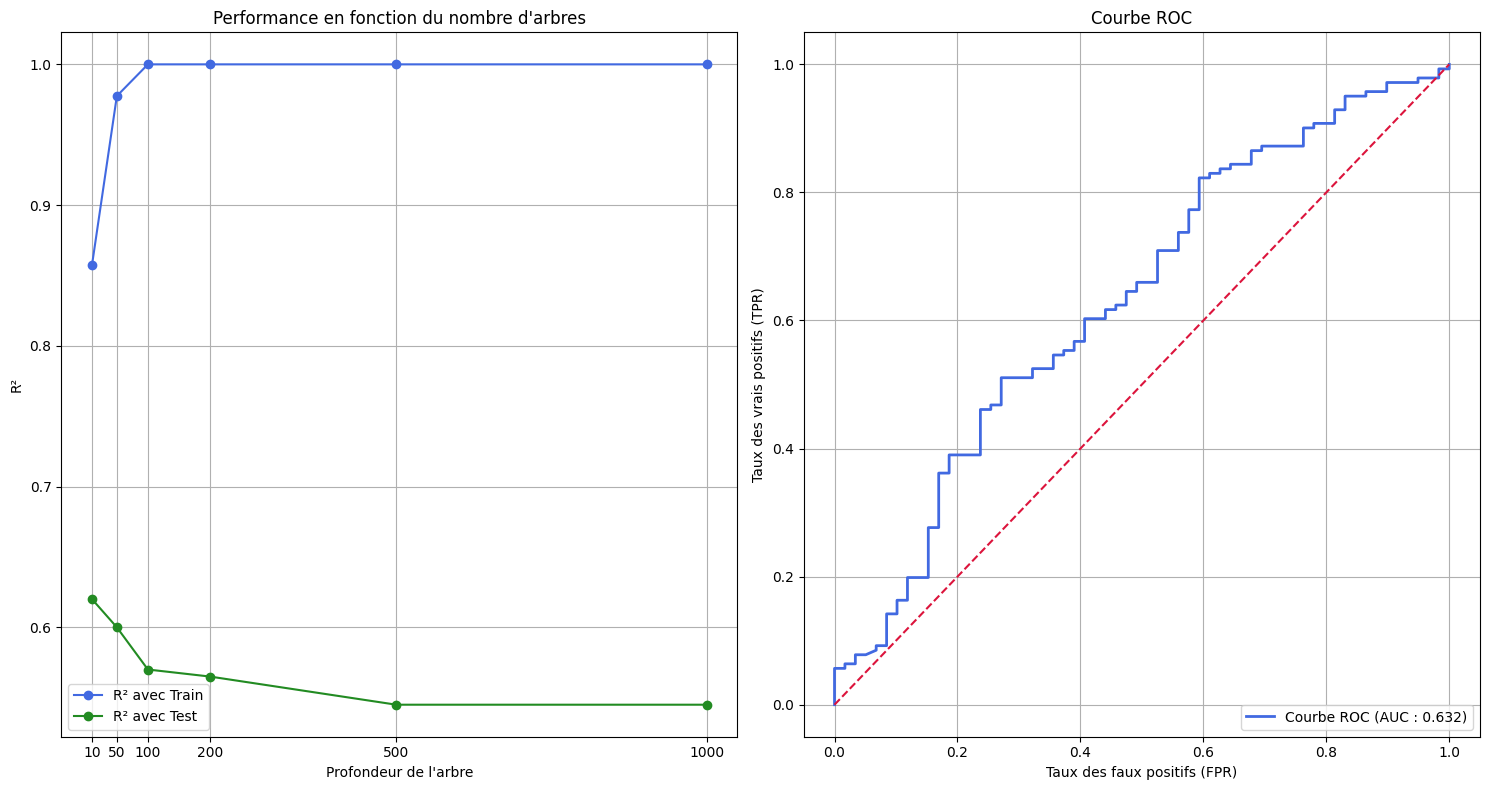

Best parameters :  {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
R² avec Train : 0.794
R² avec Test : 0.720
AUC : 0.632


In [10]:
trees = [10, 50, 100, 200, 500, 1000]
train_accuracy = np.empty(len(trees))
test_accuracy = np.empty(len(trees))

for index, tree in enumerate(trees) :
    xgb = XGBClassifier(n_estimators = tree, random_state = 42)
    xgb.fit(X_train_scaled, y_train)

    train_accuracy[index] = xgb.score(X_train_scaled, y_train)
    test_accuracy[index] = xgb.score(X_test_scaled, y_test)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}
grid_search = GridSearchCV(XGBClassifier(random_state = 42), param_grid, cv = 10, scoring = 'r2')
grid_search.fit(X_train_scaled, y_train)
best_xgb = grid_search.best_estimator_
train_accuracy_for_best_xgb = best_xgb.score(X_train_scaled, y_train)
test_accuracy_for_best_xgb = best_xgb.score(X_test_scaled, y_test)

y_pred_proba = best_xgb.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 8))

ax1.plot(trees, train_accuracy, 'o-', label = 'R² avec Train', color = 'royalblue')
ax1.plot(trees, test_accuracy, 'o-', label = 'R² avec Test', color = 'forestgreen')
ax1.set_xlabel('Profondeur de l\'arbre')
ax1.set_ylabel('R²')
ax1.set_title('Performance en fonction du nombre d\'arbres')
ax1.set_xticks(trees)
ax1.legend(loc = 'best')
ax1.grid()

ax2.plot(fpr, tpr, color = 'royalblue', lw = 2, label = f'Courbe ROC (AUC : {roc_auc:.3f})')
ax2.plot([0, 1], [0, 1], color = 'crimson', linestyle = '--')
ax2.set_xlabel('Taux des faux positifs (FPR)')
ax2.set_ylabel('Taux des vrais positifs (TPR)')
ax2.set_title('Courbe ROC')
ax2.legend(loc = 'lower right')
ax2.grid()

plt.tight_layout()
plt.show()

print("Best parameters : ", grid_search.best_params_)
print(f"R² avec Train : {train_accuracy_for_best_xgb:.3f}")
print(f"R² avec Test : {test_accuracy_for_best_xgb:.3f}")
print(f"AUC : {roc_auc:.3f}")